<a href="https://colab.research.google.com/github/OnurKerimoglu/Colab_Notebooks/blob/master/DSR_2_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np

In [3]:
datasets,info = tfds.load(
    "imdb_reviews/plain_text",
    split = ["train","test[:50%]","test[50%:]"],
    as_supervised = True,
    with_info = True
)
dataset_train_original = datasets[0]
dataset_validate_original = datasets[1]
dataset_test_original = datasets[2]
info

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteNBFSHY/imdb_reviews-train.tfrecord*...…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteNBFSHY/imdb_reviews-test.tfrecord*...:…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteNBFSHY/imdb_reviews-unsupervised.tfrec…

Dataset imdb_reviews downloaded and prepared to ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset.
    This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_path='~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0',
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
        '

In [4]:
for x,y in dataset_train_original.shuffle(1000).take(1):
  print(x.numpy().decode("utf-8"))
  print(y.numpy())

Now, it would be some sort of cliché if i began with the bit about the title, so i'll wait on that. First, this movie made me wonder why kids do stupid things like wander around in labs and break bottles. Then i realized it, this is a movie with a message, that message is beat kids and things like this won't happen. Things like what you ask? Things like a giant insectish monster growing up and causing a bit of mayhem before dying in the typical "kill the monster indirectly" fashion. Now, as promised... Blue Monkey... has nothing Blue in it nor any Simian of any kind. Now it snot like i was cheated or anything. The picture on the cover had a giant bug/crab/idiot/thing on the front chasing some screaming nurses. That kinda happened but i wanted apes! having just enjoyed MOST EXTREME PRIMATE a few nights before(half drunk on Cask and Creame's brandy mind you) i was in the mood for more monkey hijacks 80's style. Not so much. If you like snow boarding apes or blue things this movie is not 

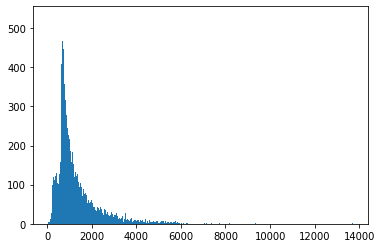

In [5]:
#Let's do a histogram of number of characters within the entire train sample
lengths = []
for x,_ in dataset_train_original:
  x = x.numpy().decode("utf-8")
  lengths += [len(x)]
plt.hist(lengths,bins=1000)
plt.show()
plt.close()

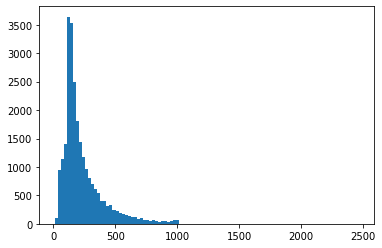

In [6]:
#Let's do a histogram of number of words within the entire train sample
lengths = []
for x,_ in dataset_train_original:
  x = x.numpy().decode("utf-8").split()
  lengths += [len(x)]
plt.hist(lengths,bins=100)
plt.show()
plt.close()

In [7]:
#Let's try a simple text encoding: bag of words
vocabulary_size = 10_000
encoder = layers.TextVectorization(
    max_tokens = vocabulary_size, #this is the number of columns 
    standardize = "lower_and_strip_punctuation", #make everything lower case and
    output_mode = "multi_hot" #this makes it a bag of words
)
encoder.adapt(dataset_train_original.map(lambda text,label: text).batch(2048)) #data includes x (text), y(label); mapping just romves the y and leaves x(text). Batching allows parallelization

In [8]:
encoder.get_vocabulary()[:10]
# ['[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i']
# here '[UNK]' stands for the unknown words, i.e., those among that did not make it to the most occuring $vocabulary_size words.
# '[UNK]' is not counted, the rest of the words are sorted according to their occurrence counts

['[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i']

In [9]:
# An example of how this encoder (trained with IMDB reviews) would encode some random text 
text = 'Hello my dear friends! It is so great to be here today!'
text_encoded = encoder(text)
print(text_encoded)
#This doesn't help: we see all 

tf.Tensor([0. 0. 0. ... 0. 0. 0.], shape=(10000,), dtype=float32)


In [10]:
def multi_hot_to_string(multi_hot):
    s = "".join([str(int(x)) for x in multi_hot])
    return s
text_encoded = encoder(text).numpy()
print(multi_hot_to_string(text_encoded))

0000011010000000000000000001000000000100000000000000000100000000000000000000000000001000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [11]:
#do the opposite: get the tokens from text_encoded
for i,num in enumerate(text_encoded):
  if num == 1:
    print(encoder.get_vocabulary()[i])

to
is
it
be
so
my
great
here
friends
today
dear
hello


In [12]:
dataset_train = dataset_train_original.cache() #we want to have preprocessed data in quick access memory (they will be accesed multiple times , for each epoch)
dataset_train = dataset_train.shuffle(25_000) #we don't want the model to learn the order (or overfit to the sequence)
dataset_train = dataset_train.batch(128)

dataset_validate = dataset_validate_original.cache()
#no shuffling is needed here
dataset_validate = dataset_validate.batch(128) #batching allows parallel computation, and speed up  

dataset_test = dataset_test_original.batch(128) #again to speed up

In [13]:
model  = models.Sequential()
model.add(encoder)
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid")) # output should be zero or one
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 10000)            0         
 torization)                                                     
                                                                 
 dense (Dense)               (None, 64)                640064    
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 640,129
Trainable params: 640,129
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

history = model.fit(
    dataset_train,
    epochs = 10,
    validation_data=dataset_validate
)

Epoch 1/10
196/196 [==============================] - 7s 18ms/step - loss: 0.3310 - accuracy: 0.8619 - val_loss: 0.2929 - val_accuracy: 0.8810
Epoch 2/10
196/196 [==============================] - 3s 15ms/step - loss: 0.1893 - accuracy: 0.9280 - val_loss: 0.3178 - val_accuracy: 0.8738
Epoch 3/10
196/196 [==============================] - 3s 15ms/step - loss: 0.1435 - accuracy: 0.9471 - val_loss: 0.3560 - val_accuracy: 0.8663
Epoch 4/10
196/196 [==============================] - 3s 16ms/step - loss: 0.1151 - accuracy: 0.9592 - val_loss: 0.4055 - val_accuracy: 0.8627
Epoch 5/10
196/196 [==============================] - 3s 15ms/step - loss: 0.0865 - accuracy: 0.9711 - val_loss: 0.4435 - val_accuracy: 0.8592
Epoch 6/10
196/196 [==============================] - 3s 15ms/step - loss: 0.0620 - accuracy: 0.9809 - val_loss: 0.5120 - val_accuracy: 0.8551
Epoch 7/10
196/196 [==============================] - 3s 15ms/step - loss: 0.0436 - accuracy: 0.9880 - val_loss: 0.5562 - val_accuracy: 0.8559

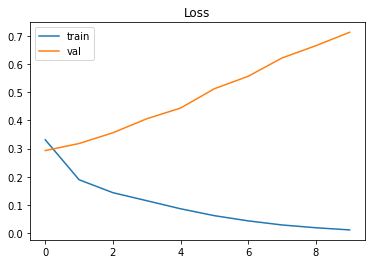

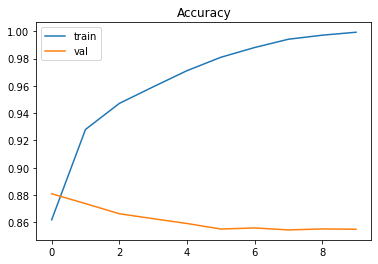

In [15]:
def render_history(history):
  plt.plot(history.history["loss"],label="train")
  plt.plot(history.history["val_loss"],label="val")
  plt.title("Loss")
  plt.legend()
  plt.show()
  plt.close()

  plt.plot(history.history["accuracy"],label="train")
  plt.plot(history.history["val_accuracy"],label="val")
  plt.title("Accuracy")
  plt.legend()
  plt.show()
  plt.close()
  pass

render_history(history)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 10000)            0         
 torization)                                                     
                                                                 
 dense_4 (Dense)             (None, 1)                 10001     
                                                                 
Total params: 10,001
Trainable params: 10,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
196/196 [==============================] - 3s 15ms/step - loss: 0.6805 - accuracy: 0.5870 - val_loss: 0.6673 - val_accuracy: 0.6575
Epoch 2/10
196/196 [==============================] - 3s 14ms/step - loss: 0.6513 - accuracy: 0.7118 - val_loss: 0.6428 - val_accuracy: 0.7345
Epoch 3/10
196/196 [==============================] - 3s 14ms/step - loss: 0.6255 - accuracy: 

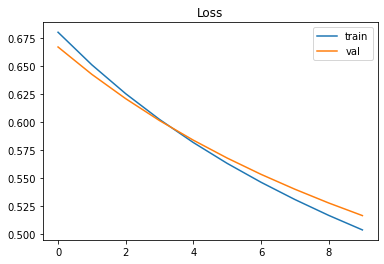

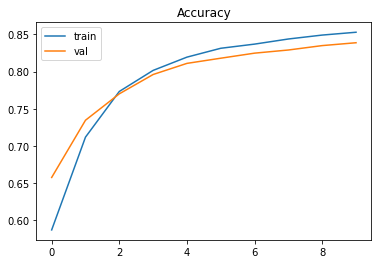

In [23]:
# Let's try to improve the model
# Decreasing accuracy with epochs is a sign of overfitting, let's simplify the model
model  = models.Sequential()
model.add(encoder)
#model.add(layers.Dense(32,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid")) # output should be zero or one
model.summary()

model.compile(
    #optimizer = "Adam",
    optimizer = tf.optimizers.Adam(
        learning_rate = 0.00005, #default is 0.001. A lower rate can solve the problem of increasing val_losses over epochs
        amsgrad = False
        ),
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

history = model.fit(
    dataset_train,
    epochs = 10,
    validation_data=dataset_validate
)

render_history(history)


Epoch 1/10
196/196 [==============================] - 3s 14ms/step - loss: 0.4915 - accuracy: 0.8575 - val_loss: 0.5059 - val_accuracy: 0.8408
Epoch 2/10
196/196 [==============================] - 4s 19ms/step - loss: 0.4802 - accuracy: 0.8605 - val_loss: 0.4960 - val_accuracy: 0.8426
Epoch 3/10
196/196 [==============================] - 3s 15ms/step - loss: 0.4697 - accuracy: 0.8640 - val_loss: 0.4869 - val_accuracy: 0.8454
Epoch 4/10
196/196 [==============================] - 4s 22ms/step - loss: 0.4598 - accuracy: 0.8664 - val_loss: 0.4783 - val_accuracy: 0.8470
Epoch 5/10
196/196 [==============================] - 4s 18ms/step - loss: 0.4506 - accuracy: 0.8693 - val_loss: 0.4702 - val_accuracy: 0.8497
Epoch 6/10
196/196 [==============================] - 5s 23ms/step - loss: 0.4418 - accuracy: 0.8716 - val_loss: 0.4625 - val_accuracy: 0.8530
Epoch 7/10
196/196 [==============================] - 4s 19ms/step - loss: 0.4336 - accuracy: 0.8733 - val_loss: 0.4555 - val_accuracy: 0.8528

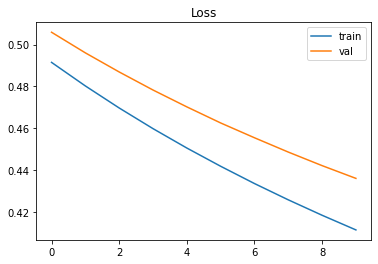

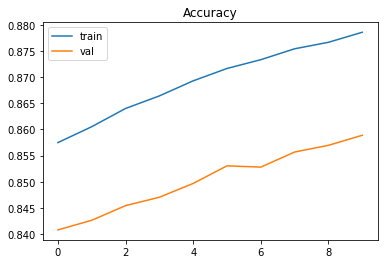

In [24]:
#continue from the previous run
history = model.fit(
    dataset_train,
    epochs = 10,
    validation_data=dataset_validate
)

render_history(history)

Epoch 1/10
196/196 [==============================] - 3s 14ms/step - loss: 0.4047 - accuracy: 0.8804 - val_loss: 0.4303 - val_accuracy: 0.8610
Epoch 2/10
196/196 [==============================] - 3s 15ms/step - loss: 0.3984 - accuracy: 0.8816 - val_loss: 0.4248 - val_accuracy: 0.8622
Epoch 3/10
196/196 [==============================] - 5s 27ms/step - loss: 0.3923 - accuracy: 0.8833 - val_loss: 0.4196 - val_accuracy: 0.8634
Epoch 4/10
196/196 [==============================] - 5s 26ms/step - loss: 0.3866 - accuracy: 0.8842 - val_loss: 0.4146 - val_accuracy: 0.8658
Epoch 5/10
196/196 [==============================] - 4s 21ms/step - loss: 0.3811 - accuracy: 0.8862 - val_loss: 0.4099 - val_accuracy: 0.8668
Epoch 6/10
196/196 [==============================] - 4s 18ms/step - loss: 0.3758 - accuracy: 0.8868 - val_loss: 0.4054 - val_accuracy: 0.8680
Epoch 7/10
196/196 [==============================] - 3s 16ms/step - loss: 0.3707 - accuracy: 0.8882 - val_loss: 0.4010 - val_accuracy: 0.8694

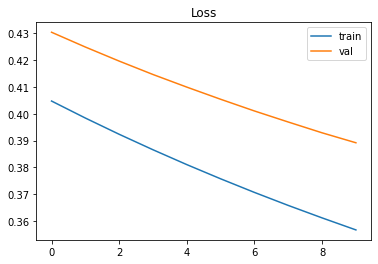

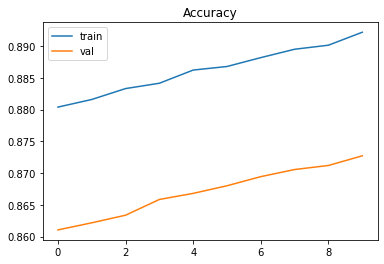

In [25]:
#continue from the previous run
history = model.fit(
    dataset_train,
    epochs = 10,
    validation_data=dataset_validate
)

render_history(history)

In [47]:
#let's test some random words/word blocks to see whether they predict good/bad movies
model.predict(["nice"])

1/1 [==============================] - 0s 154ms/step


array([[0.52748007]], dtype=float32)

In [46]:
#let's go through the vocabulary to find out which word is associated with most positive/negative scores
collection = [None]*len(encoder.get_vocabulary())
#len(collection)

for index,word in enumerate(encoder.get_vocabulary()):
  if index%1000==0:
    print(f"completed: {index}")
  prediction = model.predict([str(word)], verbose=0)[0][0]
  #print(prediction)
  collection[index] = [word,prediction]
  #if index == 5:
  #  break

collection =sorted(collection, key=lambda x: x[1], reverse=True)
#print(collection)

for word, prediction in collection[:5]:
  print(word, "\t", prediction)

Streaming output truncated to the last 5000 lines.
sheer 	 0.50590765
global 	 0.5059062
needing 	 0.5059058
bent 	 0.5059036
funeral 	 0.50589997
damsel 	 0.50589854
weapons 	 0.50589824
casually 	 0.50589705
finished 	 0.5058944
pigs 	 0.5058907
betrayed 	 0.5058907
literature 	 0.5058847
arc 	 0.50588065
stimulating 	 0.5058771
1995 	 0.5058766
vanishing 	 0.505873
mama 	 0.50587255
tramp 	 0.5058723
deadpan 	 0.505872
filmed 	 0.50586694
immigrant 	 0.5058619
g 	 0.5058618
coma 	 0.5058606
whybr 	 0.5058597
interviewed 	 0.50585955
importantly 	 0.5058574
plug 	 0.505856
universal 	 0.50584704
kiddie 	 0.5058422
bites 	 0.50584096
aging 	 0.5058396
rule 	 0.5058356
anyonebr 	 0.50583416
threatening 	 0.50583297
guided 	 0.5058317
theodore 	 0.5058275
wielding 	 0.50582635
topic 	 0.5058254
russian 	 0.50582284
uncle 	 0.5058202
arthouse 	 0.5058201
terminator 	 0.50581664
dates 	 0.50580853
eyed 	 0.5058085
babies 	 0.505807
marine 	 0.5058055
bombs 	 0.50580466
occasionally 	 0.50



```
# This is formatted as code
```

# Word Embeddings

In [53]:
vocabulary_size = 10_000
sequence_length = 128

encoder = layers.TextVectorization(
    max_tokens = vocabulary_size,
    output_sequence_length = sequence_length,
    standardize = "lower_and_strip_punctuation",
    split = "whitespace",
    output_mode = "int"
)

encoder.adapt(dataset_train_original.map(lambda text, label: text).batch(512))

In [54]:
encoder.get_vocabulary()[:10]

['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it']

In [55]:
encoder("This is aagagag greate movie! I love it a lot")
#in the resulting sequence of 128 integers, every word is encoded according to its occurrence frequency order (lower the number, higher the occurrence )

<tf.Tensor: shape=(128,), dtype=int64, numpy=
array([ 11,   7,   1,   1,  18,  10, 116,   9,   4, 169,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])>

In [57]:
encoder.get_vocabulary()[-10:]

['inch',
 'inc',
 'imdbs',
 'hosts',
 'holidays',
 'historians',
 'hiring',
 'hi',
 'hawaii',
 'hardships']

In [73]:
model = models.Sequential()
model.add(encoder)
#The following embedding layer will result in input_dim*output_dim additional parameters
model.add(layers.Embedding(input_dim=vocabulary_size, #has to be equal to the voc_size
                           output_dim=16)) #this is a tunable hyperparameter
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu")) #output layer
model.add(layers.Dense(1, activation="sigmoid")) #output layer                          
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_2 (TextV  (None, 128)              0         
 ectorization)                                                   
                                                                 
 embedding_6 (Embedding)     (None, 128, 16)           160000    
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 64)                131136    
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 291,201
Trainable params: 291,201
Non-trainable params: 0
_______________________________________________

Epoch 1/10
196/196 [==============================] - 3s 14ms/step - loss: 0.6926 - accuracy: 0.5096 - val_loss: 0.6919 - val_accuracy: 0.5266
Epoch 2/10
196/196 [==============================] - 3s 14ms/step - loss: 0.6897 - accuracy: 0.5583 - val_loss: 0.6904 - val_accuracy: 0.5482
Epoch 3/10
196/196 [==============================] - 3s 13ms/step - loss: 0.6855 - accuracy: 0.6098 - val_loss: 0.6864 - val_accuracy: 0.5910
Epoch 4/10
196/196 [==============================] - 3s 13ms/step - loss: 0.6761 - accuracy: 0.6625 - val_loss: 0.6740 - val_accuracy: 0.6421
Epoch 5/10
196/196 [==============================] - 3s 14ms/step - loss: 0.6496 - accuracy: 0.7057 - val_loss: 0.6372 - val_accuracy: 0.6921
Epoch 6/10
196/196 [==============================] - 3s 14ms/step - loss: 0.5920 - accuracy: 0.7482 - val_loss: 0.5751 - val_accuracy: 0.7423
Epoch 7/10
196/196 [==============================] - 3s 17ms/step - loss: 0.5187 - accuracy: 0.7929 - val_loss: 0.5137 - val_accuracy: 0.7774

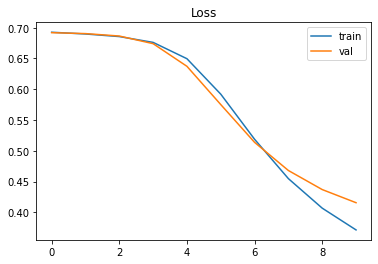

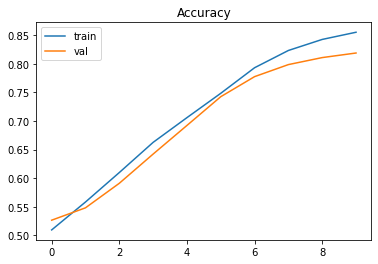

In [74]:
model.compile(
    #optimizer = "Adam",
    optimizer = tf.optimizers.Adam(
        learning_rate = 0.00005, #default is 0.001. A lower rate can solve the problem of increasing val_losses over epochs
        amsgrad = False
        ),
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

history = model.fit(
    dataset_train,
    epochs = 10,
    validation_data=dataset_validate
)

render_history(history)

Epoch 1/10
196/196 [==============================] - 3s 15ms/step - loss: 0.3436 - accuracy: 0.8666 - val_loss: 0.4003 - val_accuracy: 0.8243
Epoch 2/10
196/196 [==============================] - 3s 13ms/step - loss: 0.3211 - accuracy: 0.8763 - val_loss: 0.3896 - val_accuracy: 0.8277
Epoch 3/10
196/196 [==============================] - 3s 13ms/step - loss: 0.3018 - accuracy: 0.8845 - val_loss: 0.3825 - val_accuracy: 0.8292
Epoch 4/10
196/196 [==============================] - 3s 14ms/step - loss: 0.2852 - accuracy: 0.8922 - val_loss: 0.3762 - val_accuracy: 0.8332
Epoch 5/10
196/196 [==============================] - 3s 14ms/step - loss: 0.2702 - accuracy: 0.8982 - val_loss: 0.3743 - val_accuracy: 0.8328
Epoch 6/10
196/196 [==============================] - 3s 14ms/step - loss: 0.2564 - accuracy: 0.9054 - val_loss: 0.3699 - val_accuracy: 0.8355
Epoch 7/10
196/196 [==============================] - 3s 14ms/step - loss: 0.2436 - accuracy: 0.9106 - val_loss: 0.3685 - val_accuracy: 0.8354

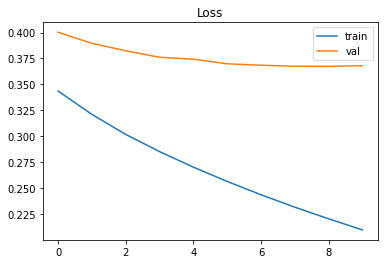

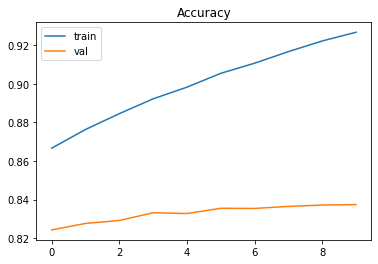

In [75]:
history = model.fit(
    dataset_train,
    epochs = 10,
    validation_data=dataset_validate
)

render_history(history)